<a href="https://colab.research.google.com/github/botamariaaurora/DT-----Laboratory-5/blob/main/ML_project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<Body>   
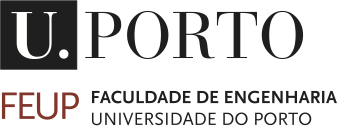   
<h1> <b>Machine Learning 2021/2022 (2<sup>nd</sup> semester) </b> </h1>
<p>Master in Electrical and Computer Engineering </p>
<p>Department of Electrical and Computer Engineering</p>
</Body>  

**A. Pedro Aguiar** (pedro.aguiar@fe.up.pt),
**Aníbal Matos** (anibal@fe.up.pt),
**Armando Sousa** (asousa@fe.up.pt),
**Andry Pinto** (amgp@fe.up.pt)

FEUP, Apr. 2022

---


# **Project #01**

**Note:** This is to be done in group of **2** elements. Use this notebook to answer all the questions. At the end of the work, you should **upload** the **notebook** and a **pdf file** with a printout of the notebook with all the results in the **moodle** platform. 

**Deadlines:** Present you work (and answer questions) on the week of **April 18** in your corresponding practical class. Upload the files until 23:59 of **April 28, 2022**.


---



# **Identification**

* **Group:** P1_APC_G16
* **Name:** João Vítor Piloni de Moreno
* **Student Number:** 202111206

* **Name:** Maria Aurora Bota
* **Student Number:** 202111378


---




**Initial setup:** To download the file **data-set.cvs**, run the next cell.

In [ ]:
!wget -O dataset.csv.zip https://www.dropbox.com/s/9y0s2ogjovkwrbm/data-set.csv.zip?dl=0 --quiet
!unzip dataset.csv.zip -d. 


Archive:  dataset.csv.zip
  inflating: ./data-set.csv          
  inflating: ./__MACOSX/._data-set.csv  


In [ ]:
# Then, run this code to get the data-set

import pandas as pd
df = pd.read_csv('data-set.csv', index_col=0)
df.head()
#df

# By convention, values of zero mean no measurements.
# The units are:
# [m] for x and y
# [m/s] for the velocities vx and vy
# [m] for the LIDAR ranges

,time,x,y,vx,vy,angle -179,angle -178,angle -177,angle -176,angle -175,...,angle 171,angle 172,angle 173,angle 174,angle 175,angle 176,angle 177,angle 178,angle 179,angle 180
0,0.0,-3.946339,-2.912177,0.711051,-0.307325,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.1,0.000000,0.000000,0.678366,-0.308563,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.2,0.000000,0.000000,0.677682,-0.285029,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.3,0.000000,0.000000,0.648523,-0.293170,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.4,0.000000,0.000000,0.644965,-0.277222,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# **Part 1: Kalman filter design**



Consider a holonomic mobile robot in the 2D plan and suppose that one can get measurements from its linear velocity every time step $t=0, 0.1, 0.2, \ldots$ (in seconds) and its position every time step $t=0, 0.5, 1.0, 1.5 \ldots$ (in seconds). Suppose also that the measurements are corrupted by additive Gaussian noise and furthermore, the linear velocity measurements may also include a unknown but constant bias term. The goal is to obtain an estimate of the position of the robot together with a measure of its uncertainty. To this end, we will implement a Kalman filter (KF)!
 
### **Model:**
Let $(x_t, y_t)$ be the position of the robot at time step $t$, and $(v_{x,t}, v_{y,t})$ its linear velocity. Let $(b_{x,t}, b_{y,t})$ be the bias term and $w_t$ and $\eta_t$ Gaussian noises. Then, a state-space model to design the KF can be written as


*x-direction*
\begin{align*}
\begin{bmatrix}
x_{t+1} \\
b_{x,t+1}
\end{bmatrix}
&= \begin{bmatrix}
1 &h \\
0 &1
\end{bmatrix}
\begin{bmatrix}
x_{t} \\
b_{x,t}
\end{bmatrix}
+\begin{bmatrix}
h \\
0
\end{bmatrix}
v_{x,t}
+ w_{x,t} \quad t=0, 0.1, 0.2, \ldots \\
z_{x,t+1} &= 
\begin{bmatrix}
1 & 0
\end{bmatrix}
\begin{bmatrix}
x_{t} \\
b_{x,t}
\end{bmatrix} +  \eta_{x,t}, \quad t=0, 0.5, 1.0, 1.5 \ldots
\end{align*}

*y-direction*
\begin{align*}
\begin{bmatrix}
y_{t+1} \\
b_{y,t+1}
\end{bmatrix}
&= \begin{bmatrix}
1 &h \\
0 &1
\end{bmatrix}
\begin{bmatrix}
y_{t} \\
b_{y,t}
\end{bmatrix}
+\begin{bmatrix}
h \\
0
\end{bmatrix}
v_{y,t}
+ w_{y,t} \quad t=0, 0.1, 0.2, \ldots \\
z_{y,t+1} &= 
\begin{bmatrix}
1 & 0
\end{bmatrix}
\begin{bmatrix}
y_{t} \\
b_{y,t}
\end{bmatrix} +  \eta_{y,t}, \quad t=0, 0.5, 1.0, 1.5 \ldots
\end{align*}
where $(z_{x,t}, z_{y,t})$ is the output vector and $h=0.1\,s$ is the sample time.

**Note:** We have decomposed the model in two decoupled parts (x and y directions). Thus, it is possible to design a KF for each direction.

**1.1** 
Implement 2 KFs (one for each direction) and display the evolution along time of the estimated position of the robot and the estimated bias term. Display also the estimated trajectory 2D.

In [ ]:
import numpy as np
from numpy import * 
import matplotlib.pyplot as plt
from numpy.linalg import inv 
from numpy.linalg import det
import random

time = df["time"].values
x = df["x"].values
y = df["y"].values
vx = df["vx"].values
vy = df["vy"].values



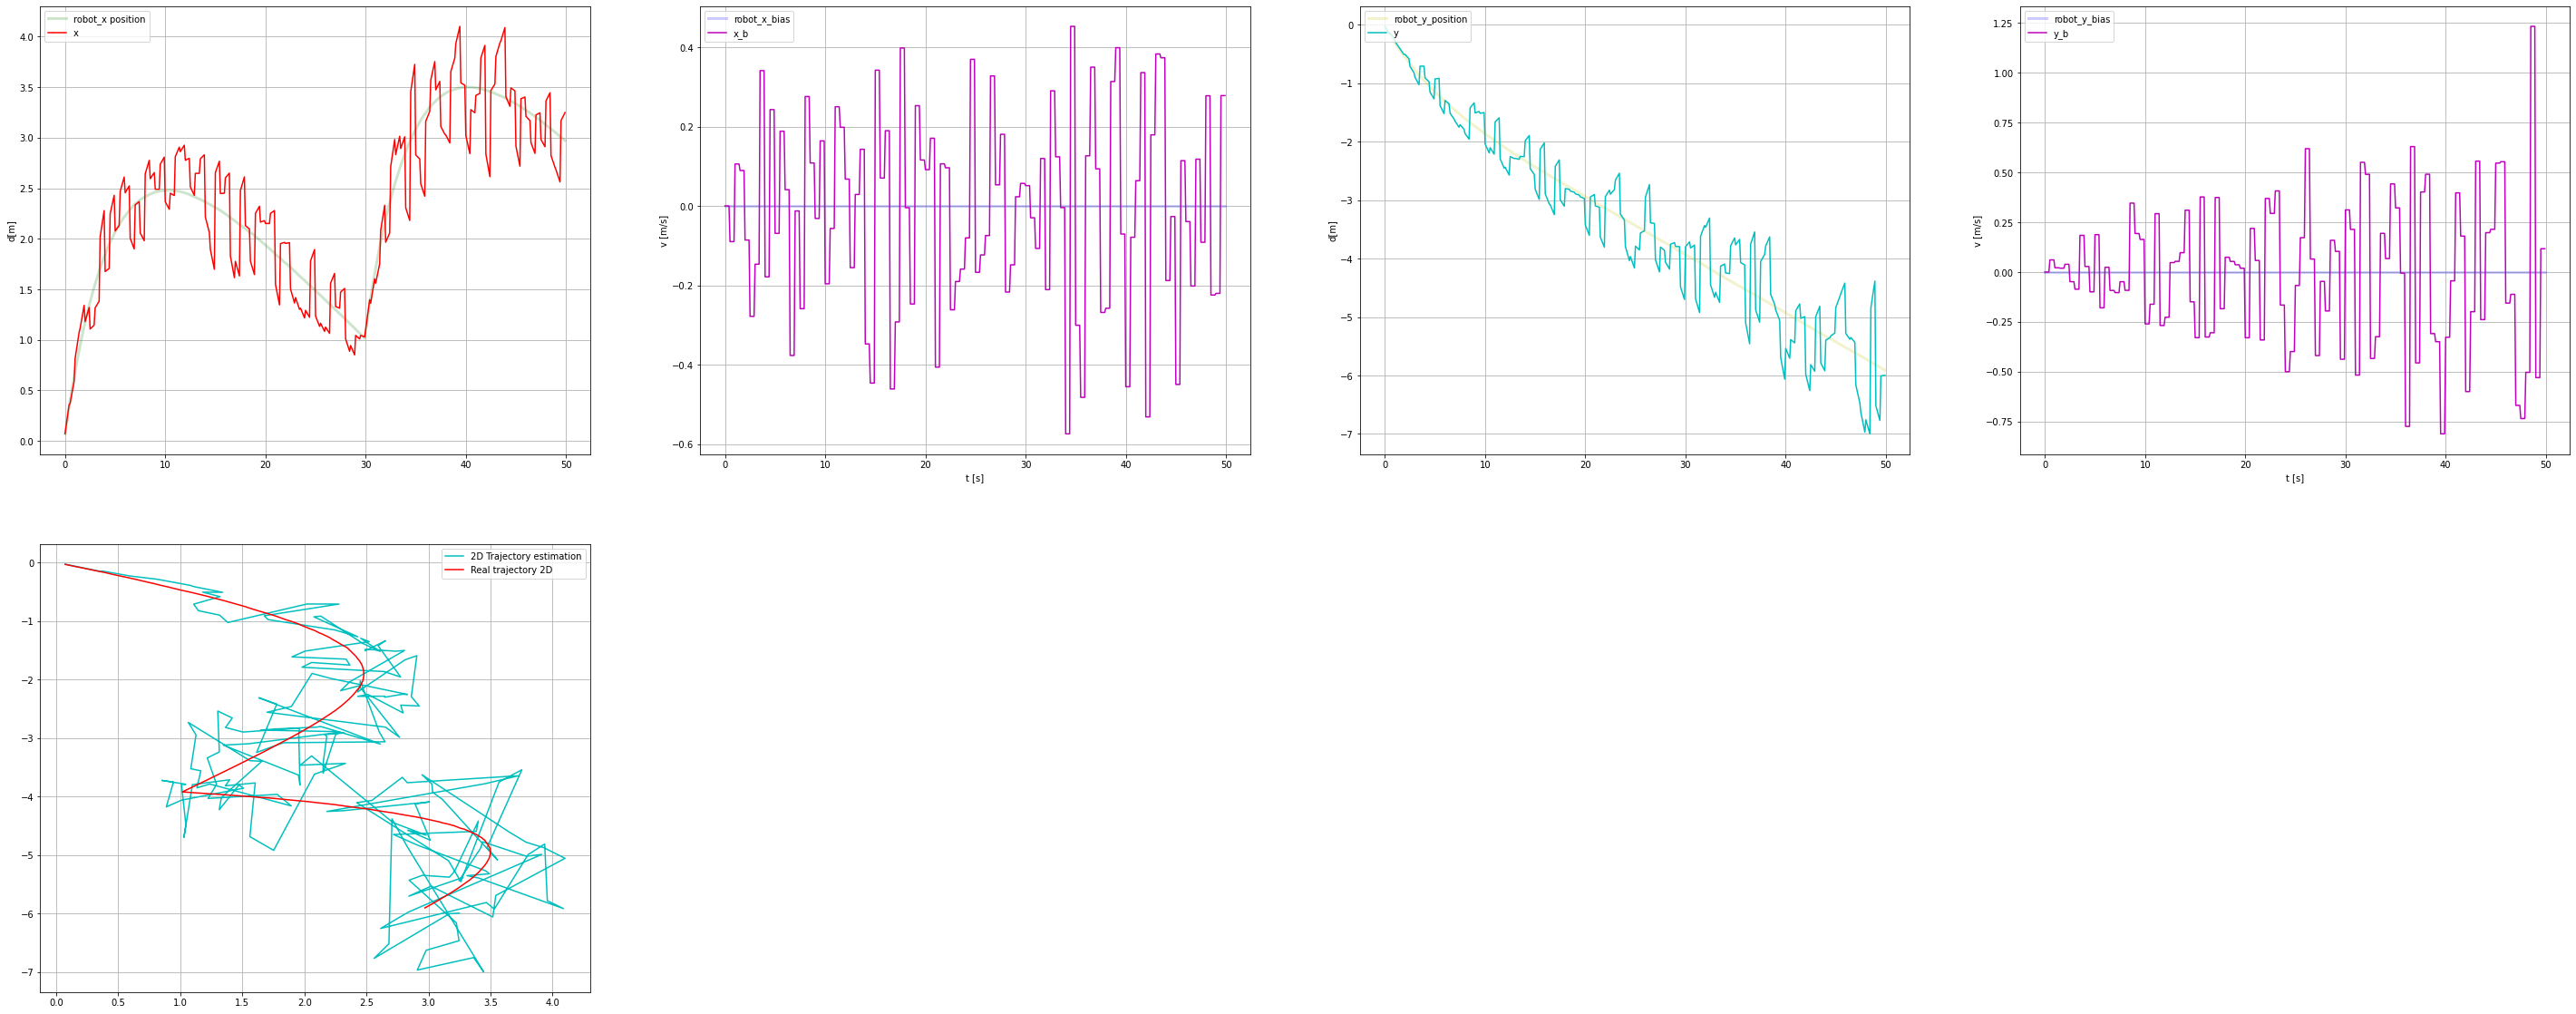

In [ ]:
# To complete

def kf_predict(X, P, A, Q, B, U): 
    """      
      X : The mean state estimate of the previous step (k−1) - shape(m,1) 
      P : The state covariance of previous step (k−1) - shape(m,m) 
      A : The transition  matrix - shape(m,m) 
      Q : The process noise covariance matrix - shape(m,m) 
      B : The input effect matrix - shape(p, m) 
      U : The control input - shape(q,1)
    """ 
    X = A @ X + B @ U 
    P = A @ P @ A.T + Q 
    return(X,P) 

def kf_update(X, P, Y, H, R): 
    """      
      K  : the Kalman Gain matrix 
      IS : the Covariance or predictive mean of Y  
    """
    IS = H @ P @ H.T + R  
    K = P @ H.T @ inv(IS) 
    X = X + K @ (Y- H @ X) 
    P = P - K @ IS @ K.T 
#    P = P - K @ H @ P 
    return (X,P) 

    
# Initial Values

PI = np.pi

#Inter sample time
dt_vel = 0.1; 
dt_pos = 0.5; 
h = 0.1; 


# Design for x

# ini state for x
Xdx = np.array( [ [0.0] , [0.0]]  ) 

# ini Covariance matrix for x
Pdx = np.array( [ [ 999.0, 0.0 ] ,
                 [ 0.0, 999.0 ] ]  ) 
# state matrix for x
Adx = np.array( [ [ 1.0, h ] ,
                [ 0.0, 1.0  ] ] ) 
# input effect matrix x
Bdx = np.array( [ [h], [0.0] ] )     

# meas matrix
Hdx = np.array( [ [ 1.0, 0.0 ] ] )          

# meas noise
Rdx = np.array([ [1.0] ] ) 

# process noise
Qdx = np.array(np.eye(2) * 5 ) 

# meas
Ydx = np.array([ [0.1] ])


# Design for y

# ini state for y
Xdy = np.array( [ [0.0] , [0.0]]  )

# ini Covariance matrix for y
Pdy = np.array( [ [ 999.0, 0.0 ] ,
                [ 0.0, 999.0 ] ]  ) 

# state matrix for y
Ady = np.array( [ [ 1.0, h ] ,
                [ 0.0, 1.0  ] ] )
# input effect matrix y
Bdy = np.array( [ [h], [0] ] )     

# meas matrix
Hdy = np.array( [ [ 1.0, 0.0 ] ] )          

# meas noise
Rdy = np.array([ [1.0] ] ) 

# process noise
Qdy = np.array(np.eye(2) * 5 ) 

# meas
Ydy = np.array([ [0.1] ]) 


# For Pritty Plotting

#x
x_t_time=[]
x_poz_time = []      # position of robot over time (mean)
x_vx_time = []      # velocity of robot over time (mean)
x_poz_sd_time = []   # position of robot over time (std_dev)
x_vx_sd_time = []   # velocity of robot over time (std_dev)
x_poz_up_time = []   # poz mean + one std_dev
x_poz_dn_time = []   # poz mean - one std_dev
x_vx_up_time = []   # vx mean + one std_dev
x_vx_dn_time = []   # vx mean - one std_dev

robot_x_poz = 0     # real robot position for x
robot_x_b = 0     # real robot bias x
robot_x_poz_time = []   # real robot position for x
robot_x_vx_time = []   # real robot velocity x

#y
y_t_time = []
y_poz_time = []      # position of robot over time (mean)
y_vy_time = []      # velocity of robot over time (mean)
y_poz_sd_time = []   # position of robot over time (std_dev)
y_vy_sd_time = []   # velocity of robot over time (std_dev)
y_poz_up_time = []   # poz mean + one std_dev
y_poz_dn_time = []   # poz mean - one std_dev
y_vy_up_time = []   # vy mean + one std_dev
y_vy_dn_time = []   # vy mean - one std_dev

robot_y_poz = 0     # real robot position for y
robot_y_b = 0     # real robot bias y
robot_y_poz_time = []   # real robot position for y
robot_y_vy_time = []   # real robot velocity y

# Kalman Filter loop

N_iter = len(time)    # implies dt*N_iter seconds

for i in arange(0, N_iter):
  if i%5 == 0:
    Udx = np.array([ [vx[i]]]) #input vector
    Udy = np.array([ [vy[i]]]) #input vector
    Ydx = x[i]
    
  #x
  robot_x_poz += h * robot_x_b + h * vx[i] # + w(process noise(Gaussian))
  robot_x_b= robot_x_b # + w(process noise (Gaussian))

  robot_x_poz_time.append(robot_x_poz)     # real robot position for y
  robot_x_vx_time.append(robot_x_b)     # real robot bias for x

  #y
  robot_y_poz += h * robot_y_b+ h * vy[i] # + (process noise(Gaussian))
  robot_y_b= robot_y_b # + (process noise(Gaussian))

  robot_y_poz_time.append(robot_y_poz)     # real robot position for y
  robot_y_vy_time.append(robot_y_b)     # real robot bias for x

  #Output measurements vectors (+/- 20%)

  Ydx = np.array([ [robot_x_poz * random.randrange(80, 120)/100 ] ])
  Ydy= np.array([ [robot_y_poz * random.randrange(80, 120)/100 ] ])

  (Xdx, Pdx) = kf_predict(Xdx, Pdx, Adx, Qdx, Bdx, Udx)
  (Xdy, Pdy) = kf_predict(Xdy, Pdy, Ady, Qdy, Bdy, Udy)

  if i%5 == 0:
    (Xdx, Pdx) = kf_update(Xdx, Pdx, Ydx, Hdx, Rdx)
    (Xdy, Pdy) = kf_update(Xdy, Pdy, Ydy, Hdy, Rdy) 

  # Printing 

  #print(x)
  x_t_time.append(time[i])
  x_poz_time.append( Xdx[0].item() )
  x_vx_time.append( Xdx[1].item() )
  x_poz_sd_time.append( sqrt( Pdx[0][0]).item() )
  x_vx_sd_time.append( sqrt( Pdx[1][1]).item() )
  x_poz_up_time.append( Xdx[0].item() + sqrt( Pdx[0][0]).item() )
  x_vx_dn_time.append( Xdx[0].item() - sqrt( Pdx[0][0]).item() )
  x_vx_up_time.append( Xdx[1].item() + sqrt( Pdx[1][1]).item() )
  x_poz_dn_time.append( Xdx[1].item() - sqrt( Pdx[1][1]).item() )
  #print(y)
  y_t_time.append(time[i])
  y_poz_time.append( Xdy[0].item() )
  y_vy_time.append( Xdy[1].item() )
  y_poz_sd_time.append( sqrt( Pdy[0][0]).item() )
  y_vy_sd_time.append( sqrt( Pdy[1][1]).item() )
  y_poz_up_time.append( Xdy[0].item() + sqrt( Pdy[0][0]).item() )
  y_vy_dn_time.append( Xdy[0].item() - sqrt( Pdy[0][0]).item() )
  y_vy_up_time.append( Xdy[1].item() + sqrt( Pdy[1][1]).item() )
  y_poz_dn_time.append( Xdy[1].item() - sqrt( Pdy[1][1]).item() )

# End For Loop

fig = plt.figure(figsize=(50,20))

# x_d
chart1 = fig.add_subplot(241)
chart1.plot(x_t_time, robot_x_poz_time, label='robot_x position', c="g", linewidth=3, alpha=0.2)
chart1.plot(x_t_time, x_poz_time, label='x', c="r")
#chart1.fill_between(x_t_time, x_poz_dn_time, x_poz_up_time, alpha=0.2, linewidth=0, label='$d\pm\sigma$')
plt.legend(loc='upper left')
chart1.set_ylabel('d[m]')
plt.grid()

# x_b
chart2 = fig.add_subplot(242)
chart2.plot(x_t_time, robot_x_vx_time, label='robot_x_bias', c="b", linewidth=3, alpha=0.2)
chart2.plot(x_t_time, x_vx_time, label='x_b', c="m")
#chart2.fill_between(x_t_time,x_vx_dn_time,x_vx_up_time, alpha=0.2, label='$v\pm\sigma$')
chart2.set_ylabel('v [m/s]')
chart2.set_xlabel('t [s]')
plt.legend(loc='upper left')
plt.grid()

# y_d
chart3 = fig.add_subplot(243)
chart3.plot(y_t_time, robot_y_poz_time, label='robot_y_position', c="y", linewidth=3, alpha=0.2)
chart3.plot(y_t_time, y_poz_time, label='y', c="c")
#chart3.fill_between(y_t_time, y_poz_dn_time, y_poz_up_time, alpha=0.2, linewidth=0, label='$d\pm\sigma$')
plt.legend(loc='upper left')
chart3.set_ylabel('d[m]')
plt.grid()

# y_b
chart4 = fig.add_subplot(244)
chart4.plot(y_t_time, robot_y_vy_time, label='robot_y_bias', c="b", linewidth=3, alpha=0.2)
chart4.plot(y_t_time, y_vy_time, label='y_b', c="m")
#chart4.fill_between(y_t_time,y_vy_dn_time,y_vy_up_time, alpha=0.2, label='$v\pm\sigma$')
chart4.set_ylabel('v [m/s]')
chart4.set_xlabel('t [s]')
plt.legend(loc='upper left')
plt.grid()

#xy
chart5 = fig.add_subplot(245)
chart5.plot(x_poz_time, y_poz_time, label='2D Trajectory estimation', c="c")
chart5.plot(robot_x_poz_time, robot_y_poz_time, label='Real trajectory 2D', c="r")
plt.legend(loc='upper right')
plt.grid()

plt.show()

# **Part 2: Linear Regression**



In this part, the aim is to build a map of the environment by combining the position of the robot with the measurements of the 2D **LIDAR** that is on-board of the robot. The LIDAR measurements consist of range (distance) from the robot to a possible obstacle for each degree of direction, that is, 
$$
r_t = \{r_\beta + \eta_r : \beta=-179^o, -178^o, \ldots, 0^o, \ldots, 180^o\}
$$
where $\eta_r$ is assumed to be Gaussian noise. The sample time is the same, that is, $h=0.1\,s$, but the LIDAR measurements are outputted every time step $t=0,0.5,1.0, 1.5, \ldots$ (in seconds) like the robot position in the previous exercise. Moreover, if there is no obstacle within the direction of the laser range or if it is far away, that is, if the distance is greater than $5\,m$, by convention the range measurement is set to zero. It may also happen that the LIDAR in some cases may output an *outlier*.

The next figure shows $r_t$ as a function of the angle $\beta$ for $t=5.0\,s$.

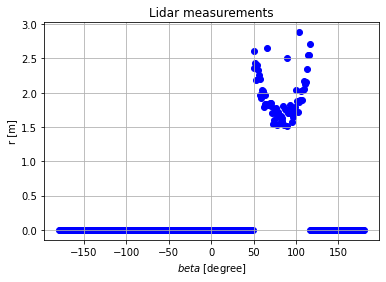

In [ ]:

time = df["time"].values
Lidar_range = df.iloc[:, np.arange(5,365,1)].values

t=5*10 # t = 5 sec * 1/sample_time
angle = np.linspace(-179, 180, num=360)

plt.figure()
plt.scatter(angle, Lidar_range[t], color='b')
plt.title('Lidar measurements')
plt.ylabel('r [m]')
plt.xlabel('$beta$ [degree]')
plt.grid();

**2.1**
Using the estimated position of the robot (computed in the previous exercise) and the LIDAR data, 
1. Obtain the cloud points in the 2D plan that the robot sense at **$t=5\,s$** and plot them. Do not forget to remove the zero ranges and note that  

$$
\begin{align*}
\hat x_{o,t} = \hat x_t + r_t \cos\beta \\
\hat y_{o,t} = \hat y_t + r_t \sin\beta
\end{align*}
$$

2. Perform a linear regression for the previous data using a model of the type
\begin{equation} \color{green} { y_n = \theta_0 + \theta_1 x_n } 
 \end{equation}
and display the results, that is, display the resulting 2d map, the mean square error, and the optimal parameters for $\color{green} \theta$. To this end, apply the related Least Square (LS) normal equations and **only use** the sklearn to confirm the obtained values.



x_o=  [3.754521047566648, 3.563734384235242, 3.571739724812648, 3.3890919369158903, 3.4891986872975793, 3.4131526161647803, 3.336059767293407, 3.272507819978478, 3.1223877603312578, 3.065163002316253, 3.0996700337252676, 3.057037900431837, 2.9160371142127772, 2.9075756951632514, 2.9376379813151097, 2.8511480696627247, 3.1553691738508562, 2.789926845918542, 2.76655549865982, 2.738270695323635, 2.694154536849511, 2.679236495471115, 2.6041645505202027, 2.5290892662867965, 2.5181386662005707, 2.529843370437107, 2.5063163219666094, 2.4579509700735205, 2.395614499780984, 2.404958517346731, 2.3628638285687753, 2.3202097104417114, 2.3078479942208014, 2.2748626909386376, 2.24290416475625, 2.2339872718726173, 2.18361826964961, 2.168835959291385, 2.137792263706203, 2.1030708918490104, 2.0766755160297263, 2.046965092458828, 2.0170462404524696, 1.9815094657257097, 1.951342366106555, 1.939595104392294, 1.904269901397441, 1.871172073732436, 1.8341939816657467, 1.797001713824398, 1.7233756706447259, 1

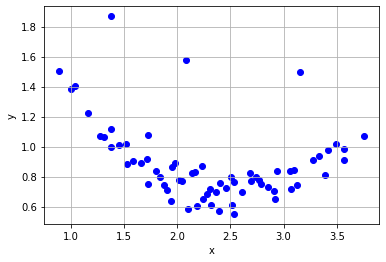

In [ ]:
# Part 2.1.1

#To complete

import numpy as np
import math

PI = np.pi

#Build the cloud points in 2D plan
x_o, y_o = [], []

t=5*10 # t = 5 sec * 1/sample_time

for i in range(len(Lidar_range[t])):
  if Lidar_range[t][i] > 0:
    x_o.append(x_poz_time[t] + Lidar_range[t][i]*math.cos(PI/180*(i-179)))
    y_o.append(y_poz_time[t] + Lidar_range[t][i]*math.sin(PI/180*(i-179)))

print("x_o= ", x_o)
print("y_o= ", y_o)

plt.scatter(x_o, y_o, color = 'b')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

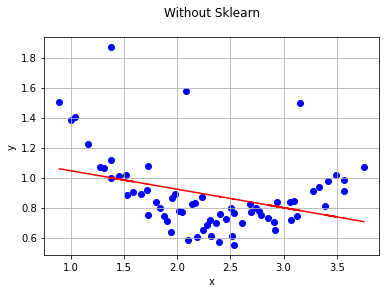

MSE  =  0.056577742699758245
Optimal parameters for theta =
 [[ 1.16814092]
 [-0.12289806]]


In [ ]:
# Part 2.1.2

#To complete

#Without Sklearn
from scipy import linalg

X_o = np.array(x_o)
Y_o = np.array(y_o)

Xt = np.transpose([X_o])
Yt = np.transpose([Y_o])

X_tht = np.ones((len(Xt), 1), dtype=float)
X_tht = np.concatenate((X_tht, Xt), axis = 1)
Y_tht = Yt

#Predicting values

tht = linalg.inv(X_tht.T @ X_tht) @ X_tht.T @ Y_tht
Y_Ptht = X_tht @ tht

#Mean squared error

Mse = (np.square(Y_tht - Y_Ptht)).mean(axis=None)

# Printing 

plt.scatter(X_o, Y_tht, color = 'b')
plt.plot(X_o, Y_Ptht, 'r')
plt.grid()
plt.title("Without Sklearn\n")
plt.xlabel('x')
plt.ylabel('y')
plt.show()

print("MSE  = ", Mse)
print("Optimal parameters for theta =\n", tht)



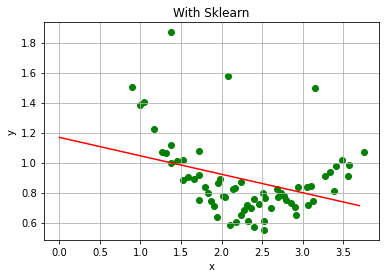

MSE  =  0.056577742699758245
Slope =  -0.12289805858771777
Intercept =  1.1681409227963664


In [ ]:
# Part 2.1.2

#To complete

#With Sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression(fit_intercept=True)

model.fit(X_o[:, np.newaxis], Y_o)

X_fit = np.linspace(0, 3.7, 1000)
Y_fit = model.predict(X_fit[:, np.newaxis])

#Mean squared error

MSE = mean_squared_error(Y_tht, Y_Ptht)

#Printing

plt.scatter(X_o, Y_o, color = "g")
plt.plot(X_fit, Y_fit, 'r')
plt.grid()
plt.title('With Sklearn')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

print("MSE  = ", MSE)
print("Slope = ", model.coef_[0])
print("Intercept = ", model.intercept_)

**2.2**
Do the same as the previous exercise but now with a polynomial model of the type
\begin{equation} \color{green} { y_n = \theta_0 + \theta_1 x_n + \theta_2 x^2_n } 
 \end{equation}



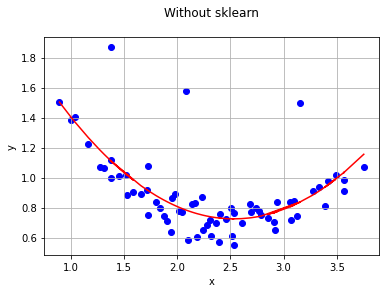

MSE  =  0.03168382684626477
Optimal parameters for theta =
 [[ 2.57414073]
 [-1.46024523]
 [ 0.28829671]]


In [ ]:
# To complete

#Without Sklearn

X_sqrd = Xt ** 2
X_sqrdtht = np.concatenate((X_tht, X_sqrd), axis = 1)

#Predicting values

tht2 = linalg.inv(X_sqrdtht.T @ X_sqrdtht) @ X_sqrdtht.T @ Y_tht
Y_Ptht2 = X_sqrdtht @ tht2

#Mean squared error

Mse2 = (np.square(Y_tht - Y_Ptht2)).mean(axis=None)

#Printing

plt.scatter(X_o, Y_tht, color="b")
plt.plot(X_o, Y_Ptht2, 'r')
plt.grid()
plt.title("Without sklearn\n")
plt.xlabel('x')
plt.ylabel('y')
plt.show()

print("MSE  = ", Mse2)
print("Optimal parameters for theta =\n", tht2)


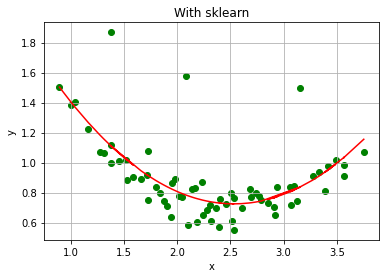

Slope =  [[-1.46024523  0.28829671]]
Intercept =  [2.57414073]


In [ ]:
#With Sklearn

from sklearn.preprocessing import PolynomialFeatures

poly_degree = 2
polynomial_features = PolynomialFeatures(degree = poly_degree)
X_TRANSF = polynomial_features.fit_transform(Xt)

model = LinearRegression()
model.fit(X_TRANSF[:,[1,2]], Yt)

Y_fit = model.predict(X_TRANSF[:,[1,2]])

plt.scatter(X_o, Y_o, color = 'g')
plt.plot(X_o, Y_fit, 'r')
plt.grid()
plt.title('With sklearn')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

print("Slope = ", model.coef_)
print("Intercept = ", model.intercept_)

**2.3**
At this point you can use sklearn! 
Do the same as the previous exercise (polynomial model) but now with **degree 10**. Moreover, implement also a regression with **Ridge** regularization and a regression with **LASSO** regularization. Do not forget to display the obtained results. What can you conclude?




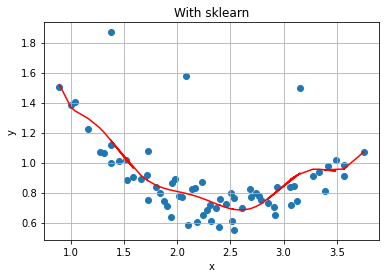

Slope =  [[-2.15342123e+02  1.84778534e+02  1.85530594e+02 -5.31467670e+02
   5.13514269e+02 -2.77191528e+02  9.11411547e+01 -1.81574249e+01
   2.01868002e+00 -9.62434440e-02]]
Intercept =  [66.63869936]


In [ ]:
# Sklearn
poly_degree = 10
polynomial_features = PolynomialFeatures(degree = poly_degree)
X_TRANSF = polynomial_features.fit_transform(Xt)

model = LinearRegression()
model.fit(X_TRANSF[:,[1,2,3,4,5,6,7,8,9,10]], Yt)

Y_fit = model.predict(X_TRANSF[:,[1,2,3,4,5,6,7,8,9,10]])

plt.scatter(X_o, Y_o)
plt.plot(X_o, Y_fit, 'r')
plt.grid()
plt.title('With sklearn')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

print("Slope = ", model.coef_)
print("Intercept = ", model.intercept_)

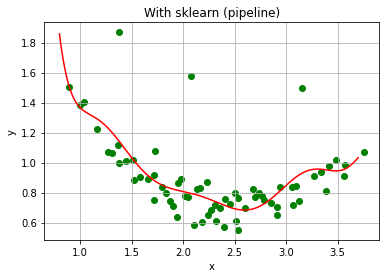

Slope =  [[ 0.00000000e+00 -2.15342182e+02  1.84778676e+02  1.85530397e+02
  -5.31467495e+02  5.13514165e+02 -2.77191486e+02  9.11411433e+01
  -1.81574229e+01  2.01867982e+00 -9.62434352e-02]]
Intercept =  [66.63870997]


In [ ]:
# With Pipeline

from sklearn.pipeline import make_pipeline

poly_degree = 10
polyreg = make_pipeline( PolynomialFeatures(poly_degree), LinearRegression() )
polyreg.fit(Xt,Yt)

X_fit = np.linspace(0.8, 3.7, 1000).reshape(-1,1)
Y_fit = polyreg.predict(X_fit)

plt.scatter(X_o, Y_o, color = 'g')
plt.plot(X_fit, Y_fit, 'r')
plt.grid()
plt.title('With sklearn (pipeline)')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

print("Slope = ", polyreg.named_steps['linearregression'].coef_)
print("Intercept = ", polyreg.named_steps['linearregression'].intercept_)

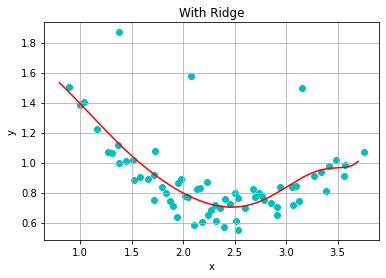

Slope =  [[ 0.         -0.1347936  -0.21540326 -0.18746999 -0.03701933  0.12939093
   0.08898003 -0.1538298   0.07151725 -0.01446181  0.00109972]]
Intercept =  [1.84592823]


In [ ]:
# With RIDGE

from sklearn.linear_model import Ridge

poly_degree = 10
ridge_model = make_pipeline(PolynomialFeatures(degree = poly_degree), Ridge(alpha=0.1))
ridge_model.fit(X_o[:, np.newaxis], Yt)
#print("MSE (Ridge Model):", mean_squared_error((Y_o.reshape(-1,1), gauss_model_ridge.predict(X_o.reshape(-1,1)))))

X_fit = np.linspace(0.8, 3.7, 1000).reshape(-1,1)
Y_fit = ridge_model.predict(X_fit)

plt.scatter(X_o,Y_o, color = 'c')
plt.plot(X_fit, Y_fit, 'r')
plt.grid()
plt.title('With Ridge')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

print("Slope = ", ridge_model.named_steps['ridge'].coef_)
print("Intercept = ", ridge_model.named_steps['ridge'].intercept_)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.092e+00, tolerance: 4.299e-04
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


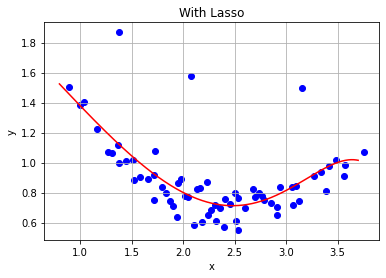

Slope =  [ 0.00000000e+00 -6.45287432e-01 -1.01055380e-01  3.19272424e-02
  8.24077570e-03  8.92685621e-04  3.32792810e-05 -2.13505383e-05
 -9.60177971e-06 -2.67028607e-06 -5.78025049e-07]
Intercept =  [2.08526974]


In [ ]:
# LASSO
from sklearn.linear_model import Lasso

poly_degree = 10
lasso_model = make_pipeline(PolynomialFeatures(degree = poly_degree), Lasso(alpha=0.001))
lasso_model.fit(X_o[:, np.newaxis], Y_tht)
#print("MSE (Lasso):", mean_squared_error(Y_o, ridge_model.predict(X_o)))

X_fit = np.linspace(0.8, 3.7, 1000).reshape(-1,1)
Y_fit = lasso_model.predict(X_fit)

plt.scatter(X_o,Y_o, color = 'b')
plt.plot(X_fit, Y_fit, 'r')
plt.grid()
plt.title('With Lasso')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

print("Slope = ", lasso_model.named_steps['lasso'].coef_)
print("Intercept = ", lasso_model.named_steps['lasso'].intercept_)

In [ ]:
#Conclusion
"""
After coding and plotting each of the methods, we can see that the results shown in the 
Ridge and Lasso graphics are way smoother than the ones with only Sklearn. It can also
be seen in the Slope related to each of those methods. Since the data is not regularized
in the first two examples, the high complexity of the model interfers in the regression,
which tries to fit as much points as possible. With regularization, the complexity of the
model is decreased, avoiding overfiting. That is exactly what happens in Ridge and Lasso
regressions. While Ridge constrains the norm, Lasso gives emphasis to more informative 
points of the model, removing zeros and reducing misfiting. That way, less points are taken
in consideration for the regression, what results in smoother slopes. From this, we can
conclude that regularization is an important step while performing a regression, for it 
leads to less complex and more desireble results.
"""

**2.4**
We now would like to use all the LIDAR data. One simple option (off-line) is to make a data set with all the cloud point positions in 2D and apply the linear regression techniques.

Using sklearn, do this for LS, LS+Ridge, LS+LASSO using the polynomial model of degree 10. Display the results (map 2D) and the optimal values for 
$\color{green} \theta$.


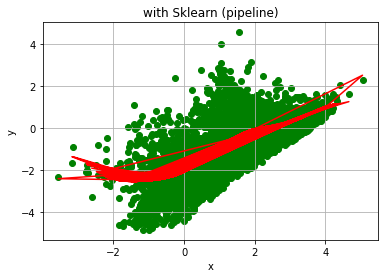

Slope =  [[ 0.00000000e+00  8.02067658e-01  4.64325980e-01 -1.30128042e-02
  -1.10953698e-01 -1.20585700e-02  1.51424040e-02  6.39816386e-04
  -8.04431508e-04  1.66190648e-05  9.47101803e-06]]
Intercept =  [-2.08588117]


In [ ]:
#To complete

#PIPELINE

import numpy as np
import math
from sklearn.pipeline import make_pipeline

PI = np.pi

for t in range(len(Lidar_range[:, 0])):

  for i in range(len(Lidar_range[t])):
    if Lidar_range[t][i] > 0:
      x_o.append(x_poz_time[t] + Lidar_range[t][i]*math.cos(PI/180*(i-179)))
      y_o.append(y_poz_time[t] + Lidar_range[t][i]*math.sin(PI/180*(i-179)))

X_o = np.array(x_o)
Y_o = np.array(y_o)

Xt = np.transpose([X_o])
Yt = np.transpose([Y_o])
Y_tht = Yt

X_sqrd = Xt ** 2
X_sqrdtht = np.ones((len(Xt), 1), dtype=float)
X_sqrdtht = np.concatenate((X_sqrdtht, Xt), axis = 1)
X_sqrdtht = np.concatenate((X_sqrdtht, X_sqrd), axis = 1)

poly_degree = 10
polyreg = make_pipeline( PolynomialFeatures(poly_degree), LinearRegression() )
polyreg.fit(Xt,Yt)
Y_fit=polyreg.predict(Xt)

plt.scatter(X_o, Y_o, color='g')
plt.plot(Xt, Y_fit, 'r')
plt.grid()
plt.title('with Sklearn (pipeline)')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

print("Slope = ", polyreg.named_steps['linearregression'].coef_)
print("Intercept = ", polyreg.named_steps['linearregression'].intercept_)

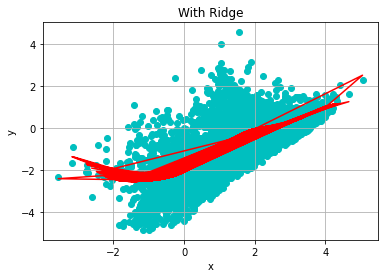

Slope =  [[ 0.00000000e+00  8.01800754e-01  4.64057179e-01 -1.26915315e-02
  -1.10869361e-01 -1.21615591e-02  1.51391006e-02  6.51689563e-04
  -8.05298418e-04  1.61751395e-05  9.52902264e-06]]
Intercept =  [-2.08575893]


In [ ]:
# RIDGE

from sklearn.linear_model import Ridge

poly_degree = 10
ridge_model = make_pipeline(PolynomialFeatures(degree = poly_degree), Ridge(alpha=0.1))
ridge_model.fit(X_o[:, np.newaxis], Yt)

Y_fit = ridge_model.predict(X_o[:, np.newaxis])

plt.scatter(X_o,Y_o, color = 'c')
plt.plot(X_o[:, np.newaxis], Y_fit, 'r')
plt.grid()
plt.title('With Ridge')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

print("Slope = ", ridge_model.named_steps['ridge'].coef_)
print("Intercept = ", ridge_model.named_steps['ridge'].intercept_)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.491e+03, tolerance: 9.687e-01
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


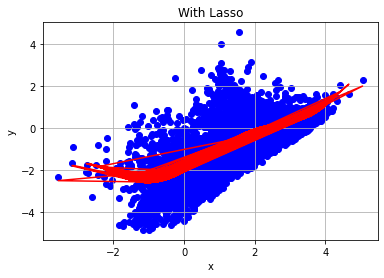

Slope =  [ 0.00000000e+00  9.42292458e-01  3.15718324e-01 -1.29168534e-01
 -2.04037577e-02  5.89946371e-03  3.18485540e-04  1.31965447e-04
 -4.16127983e-06 -3.47503954e-06 -4.97205204e-07]
Intercept =  [-2.05447585]


In [ ]:
# LASSO

from sklearn.linear_model import Lasso

poly_degree = 10
lasso_model = make_pipeline(PolynomialFeatures(degree = poly_degree), Lasso(alpha=0.001))
lasso_model.fit(X_o[:, np.newaxis], Y_tht)
#print("MSE (Lasso):", mean_squared_error(Y_o, ridge_model.predict(X_o)))

Y_fit = lasso_model.predict(X_o[:, np.newaxis])

plt.scatter(X_o,Y_o, color = 'b')
plt.plot(X_o[:, np.newaxis], Y_fit, 'r')
plt.grid()
plt.title('With Lasso')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

print("Slope = ", lasso_model.named_steps['lasso'].coef_)
print("Intercept = ", lasso_model.named_steps['lasso'].intercept_)

**2.5 (Extra)** 
Another option (on-line) is to make a linear regression with only the LIDAR data that is being acquired at each snapshot of time $t=0, 0.5, 1.0, \ldots$ and update the optimal value $\color{green} \theta$ using a gradient descent rule
$$
\color{green}
{\theta_{t+1}=\theta_t - \gamma \nabla J(\theta_t),}
$$
where $\color{green} \gamma>0$ is the learning rate, and $\color{green}
 {\nabla J(\theta_{t})}$ is the gradient at each snapshot of the cost
$$
\color{green}
{J(\theta) = \sum_{n=1}^N \big(y_n-\theta^{T} \phi(x_n)\big)^2 }
$$
where $N$ is the number of valid (that is non zero) range measurements at instant $t$.

Implement this strategy and plot the results.

**Note:** This question is optional. If you solve it, you get extra 15 points (in 100).

In [ ]:
# To complete
